In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans

In [4]:
import numpy as np

# 전처리

In [5]:
df1 = pd.read_csv('./data3.csv')

In [6]:
df2 = df1.dropna()

In [7]:
df2['Time'] = pd.to_datetime(df2['Time'], format='%Y/%m/%d')
df2 = df2.set_index("Time")
df2 = df2.drop(['ID'], axis='columns')

<ipython-input-7-9770fb95153c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time'] = pd.to_datetime(df2['Time'], format='%Y/%m/%d')


In [8]:
df3 = df2.resample('1D').mean()
df3 = df3.dropna()

In [9]:
df3.head()

,d6fd26b7,410b92b1,2c993de7,1243cee2,b01fe23c,28cf72fb,6b5790f4,1338c9d0,cbcc2b02,f69df1a6,...,7c9fd8fa,7bee82cf,673a845b,bd3aacbe,cdac7a59,bb36497c,72b0eb5a,d1eb9544,6ca41156,ab7a314a
Time,,,,,,,,,,,,,,,,,,,,,
2017-12-26,1.496250,0.264750,0.650000,0.318750,0.321417,0.537917,0.219917,0.248667,0.387000,0.354417,...,0.263417,0.117167,0.266750,0.181750,0.569583,0.369250,0.505167,0.478917,0.627417,0.167333
2017-12-27,1.308208,0.275125,0.637125,0.363333,0.416375,0.599750,0.298625,0.227583,0.365500,0.195792,...,0.258000,0.211167,0.202375,0.200667,0.534917,0.306000,0.335250,0.546875,0.400083,0.249333
2017-12-28,1.038292,0.258167,0.649250,0.387792,0.348000,0.465542,0.317583,0.252500,0.216417,0.244917,...,0.238042,0.200000,0.224167,0.181917,0.486958,0.325083,0.305125,0.563708,0.407667,0.230458
2017-12-29,0.192000,0.233000,0.409000,0.551000,0.186000,0.225000,0.351000,0.277000,0.221000,0.142000,...,0.140000,0.085000,0.151000,0.056000,0.114000,0.237000,0.165000,0.368000,0.425000,0.113000
2018-01-02,1.544636,0.661545,1.287455,0.710091,0.698455,0.498909,1.303000,0.454545,0.385182,0.671727,...,0.671091,0.201636,0.353364,0.124727,0.539000,0.304636,0.432364,0.829455,1.056455,0.199818


In [10]:
for i in range(12):
    date = '2018-' + str(i+1)
    print(i+1, len(df3[date]))

1 17
2 27
3 29
4 24
5 31
6 30
7 31
8 31
9 30
10 31
11 30
12 30


In [11]:
data5 = df3['2018-05']
data6 = df3['2018-06']
data7 = df3['2018-07']

In [12]:
len(df2['2018-05-01'])

24

# 5월 1일 데이터

In [13]:
test = df2['2018-05-01']
graph= test.iloc[:, 2:12] #임의의 값 10개 뽑은거

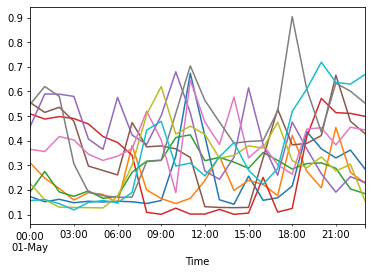

In [14]:
graph.plot(legend=False)
plt.show()

In [15]:
test = test.iloc[:, 2:]
test = test.T

In [16]:
test.head()

Time,2018-05-01 00:00:00,2018-05-01 01:00:00,2018-05-01 02:00:00,2018-05-01 03:00:00,2018-05-01 04:00:00,2018-05-01 05:00:00,2018-05-01 06:00:00,2018-05-01 07:00:00,2018-05-01 08:00:00,2018-05-01 09:00:00,...,2018-05-01 14:00:00,2018-05-01 15:00:00,2018-05-01 16:00:00,2018-05-01 17:00:00,2018-05-01 18:00:00,2018-05-01 19:00:00,2018-05-01 20:00:00,2018-05-01 21:00:00,2018-05-01 22:00:00,2018-05-01 23:00:00
d6fd26b7,0.173,0.152,0.162,0.148,0.154,0.151,0.154,0.152,0.145,0.157,...,0.142,0.256,0.158,0.168,0.216,0.437,0.367,0.330,0.362,0.285
410b92b1,0.310,0.248,0.206,0.159,0.189,0.182,0.146,0.380,0.200,0.165,...,0.198,0.239,0.222,0.177,0.421,0.276,0.209,0.454,0.271,0.228
2c993de7,0.193,0.275,0.192,0.174,0.196,0.166,0.174,0.272,0.317,0.321,...,0.313,0.288,0.352,0.320,0.285,0.307,0.310,0.288,0.204,0.185
1243cee2,0.509,0.488,0.498,0.490,0.468,0.417,0.393,0.341,0.109,0.101,...,0.101,0.106,0.251,0.110,0.125,0.416,0.572,0.514,0.511,0.499
b01fe23c,0.458,0.590,0.589,0.580,0.407,0.365,0.576,0.423,0.385,0.502,...,0.333,0.615,0.385,0.260,0.476,0.367,0.266,0.191,0.254,0.230


In [16]:
def elbow(X):
    sse = []

    for i in range(1,6):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,6), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

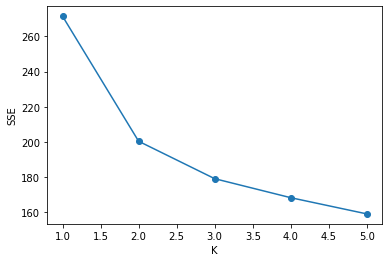

In [17]:
elbow(test)

In [18]:
def kmeans(feature):
    model = KMeans(n_clusters=3,max_iter=500, algorithm='auto')
    model.fit(feature)
    predict = pd.DataFrame(model.predict(feature))
    predict.columns=['predict']
#     return predict
    array = np.hstack([feature, predict])
    return pd.DataFrame(array, index=feature.index)

In [19]:
result = kmeans(test)

In [20]:
from sklearn.decomposition import PCA

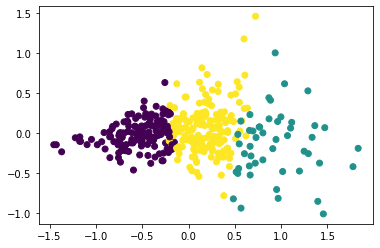

In [21]:
pca = PCA(n_components=2)
X = pca.fit_transform(result.iloc[:, :24])
plt.scatter(X[:, 0], X[:, 1], c = result.iloc[:, 24])

In [153]:
result.iloc[:]

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
d6fd26b7,0.173,0.152,0.162,0.148,0.154,0.151,0.154,0.152,0.145,0.157,...,0.256,0.158,0.168,0.216,0.437,0.367,0.330,0.362,0.285,2.0
410b92b1,0.310,0.248,0.206,0.159,0.189,0.182,0.146,0.380,0.200,0.165,...,0.239,0.222,0.177,0.421,0.276,0.209,0.454,0.271,0.228,2.0
2c993de7,0.193,0.275,0.192,0.174,0.196,0.166,0.174,0.272,0.317,0.321,...,0.288,0.352,0.320,0.285,0.307,0.310,0.288,0.204,0.185,2.0
1243cee2,0.509,0.488,0.498,0.490,0.468,0.417,0.393,0.341,0.109,0.101,...,0.106,0.251,0.110,0.125,0.416,0.572,0.514,0.511,0.499,1.0
b01fe23c,0.458,0.590,0.589,0.580,0.407,0.365,0.576,0.423,0.385,0.502,...,0.615,0.385,0.260,0.476,0.367,0.266,0.191,0.254,0.230,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bb36497c,0.378,0.386,0.377,0.354,0.436,0.653,0.765,0.442,0.241,0.203,...,0.312,0.483,0.475,0.617,0.620,0.673,0.710,0.758,0.751,1.0
72b0eb5a,0.439,0.218,0.250,0.229,0.269,0.208,0.224,0.230,0.217,0.198,...,0.284,0.290,0.359,0.503,0.528,0.556,0.846,0.282,0.268,1.0
d1eb9544,0.235,0.199,0.215,0.205,0.222,0.273,0.302,0.548,0.388,0.316,...,0.277,0.494,0.925,0.502,0.419,0.398,0.252,0.174,0.165,1.0
6ca41156,0.535,0.414,0.237,0.249,0.248,0.252,0.244,0.677,0.339,0.302,...,0.240,0.291,0.642,0.828,0.572,0.551,0.708,0.635,0.545,1.0


## 위의 결과를 시간단위로 쪼개서 봄\
0시\~7시, 8\~15시, 16~23시로 쪼갬.

In [22]:
time=[]
r = []
for i in range(3):
    time.append(test.iloc[:, i*8:8*(i+1)])
    r.append(kmeans(time[i]))

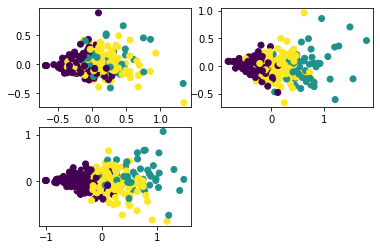

In [23]:
fig = plt.figure()
p1 = fig.add_subplot(2,2, 1)
p2 = fig.add_subplot(2, 2, 2)
p3 = fig.add_subplot(2, 2, 3)
x1 = pca.fit_transform(result.iloc[:, 0:8])
p1.scatter(x1[:, 0], x1[:, 1], c = result.iloc[:, 24])
x2 = pca.fit_transform(result.iloc[:, 8:16])
p2.scatter(x2[:, 0], x2[:, 1], c = result.iloc[:, 24])
x3 = pca.fit_transform(result.iloc[:, 16:24])
p3.scatter(x3[:, 0], x3[:, 1], c = result.iloc[:, 24])

오전 부분만 클러스터링 해서 오후, 저녁에 적용

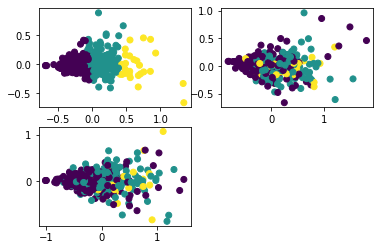

In [24]:
fig = plt.figure()
p1 = fig.add_subplot(2,2, 1)
p2 = fig.add_subplot(2, 2, 2)
p3 = fig.add_subplot(2, 2, 3)
x1 = pca.fit_transform(r[0].iloc[:, :8])
p1.scatter(x1[:, 0], x1[:, 1], c = r[0].iloc[:, 8])
x2 = pca.fit_transform(r[1].iloc[:, :8])
p2.scatter(x2[:, 0], x2[:, 1], c = r[0].iloc[:, 8])
x3 = pca.fit_transform(r[2].iloc[:, :8])
p3.scatter(x3[:, 0], x3[:, 1], c = r[0].iloc[:, 8])

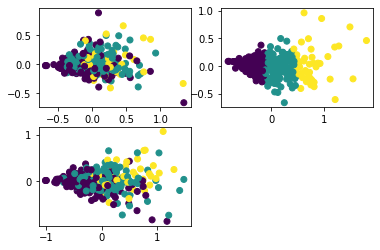

In [25]:
fig = plt.figure()
p1 = fig.add_subplot(2,2, 1)
p2 = fig.add_subplot(2, 2, 2)
p3 = fig.add_subplot(2, 2, 3)
x1 = pca.fit_transform(r[0].iloc[:, :8])
p1.scatter(x1[:, 0], x1[:, 1], c = r[1].iloc[:, 8])
x2 = pca.fit_transform(r[1].iloc[:, :8])
p2.scatter(x2[:, 0], x2[:, 1], c = r[1].iloc[:, 8])
x3 = pca.fit_transform(r[2].iloc[:, :8])
p3.scatter(x3[:, 0], x3[:, 1], c = r[1].iloc[:, 8])

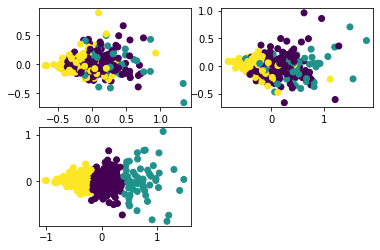

In [26]:
fig = plt.figure()
p1 = fig.add_subplot(2,2, 1)
p2 = fig.add_subplot(2, 2, 2)
p3 = fig.add_subplot(2, 2, 3)
x1 = pca.fit_transform(r[0].iloc[:, :8])
p1.scatter(x1[:, 0], x1[:, 1], c = r[2].iloc[:, 8])
x2 = pca.fit_transform(r[1].iloc[:, :8])
p2.scatter(x2[:, 0], x2[:, 1], c = r[2].iloc[:, 8])
x3 = pca.fit_transform(r[2].iloc[:, :8])
p3.scatter(x3[:, 0], x3[:, 1], c = r[2].iloc[:, 8])

In [27]:
r[1].iloc[:5]

,0,1,2,3,4,5,6,7,8
d6fd26b7,0.145,0.157,0.337,0.674,0.419,0.160,0.142,0.256,1.0
410b92b1,0.200,0.165,0.145,0.166,0.238,0.337,0.198,0.239,0.0
2c993de7,0.317,0.321,0.413,0.424,0.319,0.332,0.313,0.288,1.0
1243cee2,0.109,0.101,0.126,0.102,0.102,0.121,0.101,0.106,0.0
b01fe23c,0.385,0.502,0.680,0.513,0.277,0.243,0.333,0.615,1.0


점심시간 클러스터링 결과

In [28]:
graph = r[1].iloc[50:100]

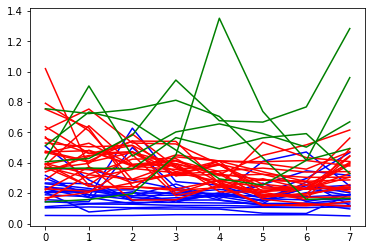

In [29]:
plt.figure()
g0 = graph[:][graph[8] == 0]
g0 = g0.iloc[:, :8].T
g1 = graph[:][graph[8] == 1]
g1 = g1.iloc[:, :8].T
g2 = graph[:][graph[8] == 2]
g2 = g2.iloc[:, :8].T
plt.plot(g0, color="blue")
plt.plot(g1, color="red")
plt.plot(g2, color="green")

점심시간 클러스터링 결과를 저녁시간에 적용한 결과

In [30]:
graph = time[2].iloc[10:70, :]

<ipython-input-31-8202fffe6395>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g0 = graph[:][r[2][8] == 0]
<ipython-input-31-8202fffe6395>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g1 = graph[:][r[2][8] == 1]
<ipython-input-31-8202fffe6395>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g2 = graph[:][r[2][8] == 2]


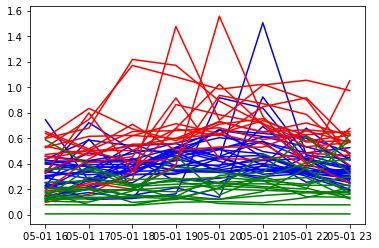

In [31]:
plt.figure()
g0 = graph[:][r[2][8] == 0]
g0 = g0.iloc[:, :8].T
g1 = graph[:][r[2][8] == 1]
g1 = g1.iloc[:, :8].T
g2 = graph[:][r[2][8] == 2]
g2 = g2.iloc[:, :8].T
plt.plot(g0, color="blue")
plt.plot(g1, color="red")
plt.plot(g2, color="green")

점심시간 클러스터링이 잘된거같아서 5/1일자 클러스터링 결과 -> 5월 데이터에 적용해봄\
하나는 5월 일평균, 하나는 그냥 5월 데이터 전체

In [50]:
dt = data5.T

In [51]:
dt.head()

Time,2018-05-01,2018-05-02,2018-05-03,2018-05-04,2018-05-05,2018-05-06,2018-05-07,2018-05-08,2018-05-09,2018-05-10,...,2018-05-22,2018-05-23,2018-05-24,2018-05-25,2018-05-26,2018-05-27,2018-05-28,2018-05-29,2018-05-30,2018-05-31
d6fd26b7,0.244125,0.684917,0.720000,0.678292,0.151792,0.151500,0.193833,0.763957,0.654333,0.678625,...,0.208500,0.720083,0.775917,0.872125,0.239583,0.180739,0.707435,0.702810,0.624182,0.712875
410b92b1,0.240250,0.253042,0.272458,0.293042,0.256667,0.274417,0.281917,0.255652,0.225958,0.267833,...,0.299875,0.237708,0.245958,0.228417,0.261083,0.283609,0.257304,0.263048,0.273227,0.284167
2c993de7,0.275833,0.292542,0.283167,0.333292,0.293042,0.404125,0.428250,0.354304,0.358250,0.417917,...,0.343083,0.338542,0.284708,0.279042,0.373542,0.419304,0.370000,0.324190,0.311455,0.339917
1243cee2,0.311250,0.311583,0.314250,0.221292,0.098125,0.098500,0.101583,0.106261,0.098833,0.360458,...,0.348750,0.208500,0.199250,0.200833,0.212375,0.177565,0.204739,0.206333,0.183045,0.190500
b01fe23c,0.415208,0.467208,0.438833,0.426917,0.455833,0.429042,0.370708,0.401087,0.670125,0.550167,...,0.460333,0.410042,0.367750,0.381750,0.451125,0.490435,0.444087,0.410667,0.376364,0.402208


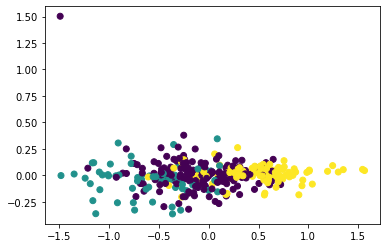

In [52]:
pca = PCA(n_components=2)
X = pca.fit_transform(dt)
plt.scatter(X[:, 0], X[:, 1], c = r[2].iloc[:, 8])

5월 일평균 데이터

In [75]:
dt2 = df2['2018-05']

In [76]:
dt2 = dt2.iloc[:, 2:]
dt2 = dt2.T

In [77]:
dt2.head()

Time,2018-05-01 00:00:00,2018-05-01 01:00:00,2018-05-01 02:00:00,2018-05-01 03:00:00,2018-05-01 04:00:00,2018-05-01 05:00:00,2018-05-01 06:00:00,2018-05-01 07:00:00,2018-05-01 08:00:00,2018-05-01 09:00:00,...,2018-05-31 14:00:00,2018-05-31 15:00:00,2018-05-31 16:00:00,2018-05-31 17:00:00,2018-05-31 18:00:00,2018-05-31 19:00:00,2018-05-31 20:00:00,2018-05-31 21:00:00,2018-05-31 22:00:00,2018-05-31 23:00:00
d6fd26b7,0.173,0.152,0.162,0.148,0.154,0.151,0.154,0.152,0.145,0.157,...,0.847,0.884,1.015,0.993,0.691,0.579,0.460,0.450,0.354,0.353
410b92b1,0.310,0.248,0.206,0.159,0.189,0.182,0.146,0.380,0.200,0.165,...,0.249,0.477,0.282,0.160,0.355,0.294,0.467,0.532,0.445,0.458
2c993de7,0.193,0.275,0.192,0.174,0.196,0.166,0.174,0.272,0.317,0.321,...,0.294,0.305,0.342,0.447,0.353,0.402,0.526,0.343,0.221,0.346
1243cee2,0.509,0.488,0.498,0.490,0.468,0.417,0.393,0.341,0.109,0.101,...,0.165,0.151,0.177,0.153,0.235,0.214,0.214,0.316,0.247,0.218
b01fe23c,0.458,0.590,0.589,0.580,0.407,0.365,0.576,0.423,0.385,0.502,...,0.344,0.424,0.337,0.487,0.394,0.424,0.516,0.375,0.321,0.430


In [78]:
tmp = r[2].iloc[:, 8].to_frame()

In [80]:
dt2 = pd.merge(dt2, tmp, left_index=True, right_index=True)
dt2 = dt2.dropna()

In [81]:
dt2.head()

,2018-05-01 00:00:00,2018-05-01 01:00:00,2018-05-01 02:00:00,2018-05-01 03:00:00,2018-05-01 04:00:00,2018-05-01 05:00:00,2018-05-01 06:00:00,2018-05-01 07:00:00,2018-05-01 08:00:00,2018-05-01 09:00:00,...,2018-05-31 15:00:00,2018-05-31 16:00:00,2018-05-31 17:00:00,2018-05-31 18:00:00,2018-05-31 19:00:00,2018-05-31 20:00:00,2018-05-31 21:00:00,2018-05-31 22:00:00,2018-05-31 23:00:00,8
d6fd26b7,0.173,0.152,0.162,0.148,0.154,0.151,0.154,0.152,0.145,0.157,...,0.884,1.015,0.993,0.691,0.579,0.460,0.450,0.354,0.353,0.0
410b92b1,0.310,0.248,0.206,0.159,0.189,0.182,0.146,0.380,0.200,0.165,...,0.477,0.282,0.160,0.355,0.294,0.467,0.532,0.445,0.458,2.0
2c993de7,0.193,0.275,0.192,0.174,0.196,0.166,0.174,0.272,0.317,0.321,...,0.305,0.342,0.447,0.353,0.402,0.526,0.343,0.221,0.346,2.0
1243cee2,0.509,0.488,0.498,0.490,0.468,0.417,0.393,0.341,0.109,0.101,...,0.151,0.177,0.153,0.235,0.214,0.214,0.316,0.247,0.218,0.0
b01fe23c,0.458,0.590,0.589,0.580,0.407,0.365,0.576,0.423,0.385,0.502,...,0.424,0.337,0.487,0.394,0.424,0.516,0.375,0.321,0.430,0.0


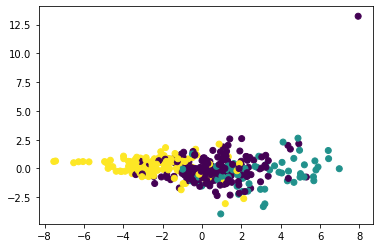

In [85]:
pca = PCA(n_components=2)
X = pca.fit_transform(dt2.iloc[:, :674])
plt.scatter(X[:, 0], X[:, 1], c = dt2.iloc[:, 674])

5월 전체 데이터

In [87]:
grouped.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
d6fd26b7,0.173,0.152,0.162,0.148,0.154,0.151,0.154,0.152,0.145,0.157,...,0.256,0.158,0.168,0.216,0.437,0.367,0.330,0.362,0.285,1.0
410b92b1,0.310,0.248,0.206,0.159,0.189,0.182,0.146,0.380,0.200,0.165,...,0.239,0.222,0.177,0.421,0.276,0.209,0.454,0.271,0.228,1.0
2c993de7,0.193,0.275,0.192,0.174,0.196,0.166,0.174,0.272,0.317,0.321,...,0.288,0.352,0.320,0.285,0.307,0.310,0.288,0.204,0.185,0.0
1243cee2,0.509,0.488,0.498,0.490,0.468,0.417,0.393,0.341,0.109,0.101,...,0.106,0.251,0.110,0.125,0.416,0.572,0.514,0.511,0.499,0.0
b01fe23c,0.458,0.590,0.589,0.580,0.407,0.365,0.576,0.423,0.385,0.502,...,0.615,0.385,0.260,0.476,0.367,0.266,0.191,0.254,0.230,0.0
28cf72fb,0.555,0.515,0.536,0.479,0.297,0.279,0.261,0.474,0.375,0.379,...,0.129,0.330,0.528,0.383,0.389,0.421,0.666,0.479,0.429,0.0
6b5790f4,0.365,0.356,0.417,0.403,0.345,0.320,0.337,0.368,0.520,0.403,...,0.330,0.382,0.303,0.264,0.447,0.453,0.383,0.455,0.444,0.0
1338c9d0,0.548,0.620,0.580,0.306,0.191,0.177,0.170,0.171,0.315,0.320,...,0.397,0.400,0.521,0.904,0.609,0.435,0.634,0.601,0.553,2.0
aa71b3cb,0.358,0.293,0.168,0.150,0.187,0.169,0.230,0.220,0.248,0.182,...,0.274,0.229,0.271,0.443,0.260,0.285,0.341,0.345,0.342,1.0
08ca25cc,0.316,0.306,0.298,0.291,0.272,0.292,0.409,0.537,0.432,0.484,...,0.197,0.190,0.436,0.619,0.713,0.635,0.737,0.620,0.386,2.0


In [ ]:
x2 = pca.fit_transform(r[1].iloc[:, :8])
plt.scatter(x2[:, 0], x2[:, 1], c = r[1].iloc[:, 8])

In [ ]:
r2 = kmeans(time2)
x1 = pca.fit_transform(r1.iloc[:, :8])
plt.scatter(x1[:, 0], x1[:, 1], c = r1.iloc[:, 8])

In [40]:
r1.head()

,0,1,2,3,4,5,6,7,8
d6fd26b7,0.173,0.152,0.162,0.148,0.154,0.151,0.154,0.152,1.0
410b92b1,0.310,0.248,0.206,0.159,0.189,0.182,0.146,0.380,0.0
2c993de7,0.193,0.275,0.192,0.174,0.196,0.166,0.174,0.272,1.0
1243cee2,0.509,0.488,0.498,0.490,0.468,0.417,0.393,0.341,2.0
b01fe23c,0.458,0.590,0.589,0.580,0.407,0.365,0.576,0.423,2.0
...,...,...,...,...,...,...,...,...,...
bb36497c,0.378,0.386,0.377,0.354,0.436,0.653,0.765,0.442,2.0
72b0eb5a,0.439,0.218,0.250,0.229,0.269,0.208,0.224,0.230,0.0
d1eb9544,0.235,0.199,0.215,0.205,0.222,0.273,0.302,0.548,0.0
6ca41156,0.535,0.414,0.237,0.249,0.248,0.252,0.244,0.677,0.0


In [27]:
date2 = df2['2018-05-02']
date2 = date2.iloc[:, 2:]
date2

,d6fd26b7,410b92b1,2c993de7,1243cee2,b01fe23c,28cf72fb,6b5790f4,1338c9d0,cbcc2b02,f69df1a6,...,7c9fd8fa,7bee82cf,673a845b,bd3aacbe,cdac7a59,bb36497c,72b0eb5a,d1eb9544,6ca41156,ab7a314a
Time,,,,,,,,,,,,,,,,,,,,,
2018-05-02 00:00:00,0.186,0.190,0.189,0.488,0.289,0.411,0.432,0.555,0.130,0.373,...,0.166,0.131,0.118,0.099,0.612,0.478,0.259,0.233,0.540,0.271
2018-05-02 01:00:00,0.139,0.160,0.174,0.491,0.197,0.405,0.371,0.714,0.123,0.228,...,0.138,0.128,0.101,0.086,0.257,0.373,0.232,0.193,0.411,0.276
2018-05-02 02:00:00,0.155,0.170,0.292,0.472,0.157,0.203,0.367,0.509,0.119,0.167,...,0.147,0.128,0.105,0.099,0.248,0.261,0.230,0.169,0.248,0.278
2018-05-02 03:00:00,0.150,0.177,0.266,0.464,0.183,0.261,0.383,0.483,0.123,0.166,...,0.159,0.148,0.106,0.125,0.223,0.164,0.220,0.168,0.244,0.276
2018-05-02 04:00:00,0.150,0.160,0.234,0.439,0.310,0.178,0.344,0.385,0.123,0.145,...,0.148,0.261,0.119,0.099,0.204,0.141,0.199,0.337,0.232,0.228
2018-05-02 05:00:00,0.160,0.170,0.193,0.419,0.493,0.157,0.340,0.388,0.118,0.167,...,0.139,0.384,0.112,0.084,0.248,0.947,0.219,0.463,0.238,0.244
2018-05-02 06:00:00,0.135,0.158,0.160,0.529,0.279,0.158,0.313,0.373,0.161,0.184,...,0.197,0.414,0.171,0.085,0.252,0.828,0.286,0.431,0.254,0.233
2018-05-02 07:00:00,0.809,0.436,0.447,0.400,0.507,0.289,0.841,0.261,0.688,0.504,...,0.329,0.227,0.209,0.099,0.606,0.457,0.232,0.290,0.655,0.227
2018-05-02 08:00:00,0.953,0.236,0.322,0.127,0.386,0.143,0.509,0.699,0.375,0.331,...,0.249,0.125,0.381,0.084,0.702,0.207,0.217,0.285,0.447,0.340


In [111]:
result5.head()

,0,1
d6fd26b7,0.552486,1.0
410b92b1,0.263469,2.0
2c993de7,0.368018,1.0
1243cee2,0.222370,0.0
b01fe23c,0.443946,1.0


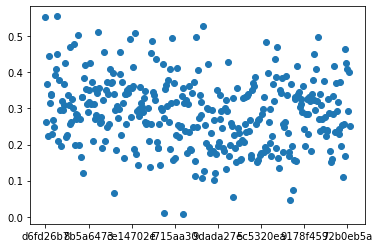

In [108]:
result5[0].plot(linestyle='none', marker='o')
plt.show()

In [126]:
result6 = pd.concat([feature6, result5[1]], axis=1)

In [128]:
result6.head()

,0,1
d6fd26b7,0.624130,2.0
410b92b1,0.306310,1.0
2c993de7,0.294909,2.0
1243cee2,0.209457,0.0
b01fe23c,0.347151,2.0


In [130]:
def chart(result):
    plt.scatter(result.index, result[0], c=result[1])
    plt.colorbar()
    plt.show()

In [133]:
result7 = pd.concat([feature7, result5[1]], axis=1)

In [143]:
test2.head()

,0,1,2,3,4,5,6,7,8,9,...,367,368,369,370,371,372,373,374,375,376
d6fd26b7,1.496250,1.308208,1.038292,0.192,1.544636,0.606,1.214917,1.169417,1.306542,0.304609,...,0.906583,0.962917,0.945292,0.174750,0.168083,0.917375,0.974000,1.018542,0.794958,0.0
410b92b1,0.264750,0.275125,0.258167,0.233,0.661545,0.326,0.330042,0.277250,0.298958,0.310913,...,0.429125,0.508542,0.489625,0.553417,0.437792,0.414583,0.359542,0.458583,0.412167,0.0
2c993de7,0.650000,0.637125,0.649250,0.409,1.287455,0.680,0.470958,0.597458,0.542208,0.653435,...,0.532375,0.514292,0.465833,0.669083,0.657083,0.538083,0.427208,0.605833,0.513292,0.0
1243cee2,0.318750,0.363333,0.387792,0.551,0.710091,0.502,0.345125,0.355000,0.336292,0.484478,...,0.355458,0.308000,0.335542,0.460792,0.418292,0.332667,0.342750,0.434375,0.367542,0.0
b01fe23c,0.321417,0.416375,0.348000,0.186,0.698455,0.636,0.396375,0.364708,0.354792,0.366913,...,0.297250,0.398125,0.539333,0.316875,0.277458,0.296875,0.304042,0.416875,0.369125,0.0


In [138]:
plt.scatter(result6.index, result6[0], c=result6[1])
plt.colorbar()
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
Time,,,,,,,,,,,,,,,,,,,,,
2017-12-26,1.496250,0.264750,0.650000,0.318750,0.321417,0.537917,0.219917,0.248667,0.387000,0.354417,...,0.117167,0.266750,0.181750,0.569583,0.369250,0.505167,0.478917,0.627417,0.167333,0.0
2017-12-27,1.308208,0.275125,0.637125,0.363333,0.416375,0.599750,0.298625,0.227583,0.365500,0.195792,...,0.211167,0.202375,0.200667,0.534917,0.306000,0.335250,0.546875,0.400083,0.249333,0.0
2017-12-28,1.038292,0.258167,0.649250,0.387792,0.348000,0.465542,0.317583,0.252500,0.216417,0.244917,...,0.200000,0.224167,0.181917,0.486958,0.325083,0.305125,0.563708,0.407667,0.230458,0.0
2017-12-29,0.192000,0.233000,0.409000,0.551000,0.186000,0.225000,0.351000,0.277000,0.221000,0.142000,...,0.085000,0.151000,0.056000,0.114000,0.237000,0.165000,0.368000,0.425000,0.113000,0.0
2018-01-02,1.544636,0.661545,1.287455,0.710091,0.698455,0.498909,1.303000,0.454545,0.385182,0.671727,...,0.201636,0.353364,0.124727,0.539000,0.304636,0.432364,0.829455,1.056455,0.199818,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-27,0.168083,0.437792,0.657083,0.418292,0.277458,0.567208,1.029833,0.124750,0.482458,0.428125,...,0.127125,0.333333,0.182083,0.518917,0.534000,0.241417,0.531625,0.451583,0.234042,0.0
2019-01-28,0.917375,0.414583,0.538083,0.332667,0.296875,0.309042,0.326250,0.225417,0.284542,0.439333,...,0.132625,0.313417,0.184667,0.504292,0.370792,0.300667,0.409250,0.536125,0.287833,0.0
2019-01-29,0.974000,0.359542,0.427208,0.342750,0.304042,0.464917,0.417667,0.259583,0.263000,0.400708,...,0.128458,0.292042,0.190167,0.408250,0.396833,0.299125,0.372458,0.575458,0.241542,0.0


In [42]:
df3 = df2.resample('1D').mean()
# df3 = df3.dropna() #

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [36]:
df2['Time'] = df2['Time'].str.slice(start=0, stop=10)

<ipython-input-36-3ba75577c317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time'] = df2['Time'].str.slice(start=0, stop=10)


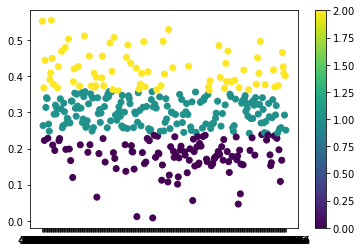

In [117]:
plt.scatter(result5.index, result5[0], c=result5[1])
plt.colorbar()
plt.show()

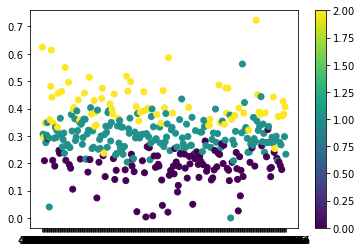

In [129]:
plt.scatter(result6.index, result6[0], c=result6[1])
plt.colorbar()
plt.show()

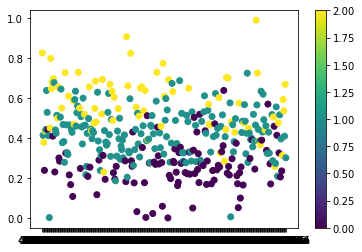

In [134]:
chart(result7)